In [9]:
import pandas as pd

In [10]:
df1 = pd.read_csv('./data/sba/SBAcase.11.13.17.csv')
df2 = pd.read_csv('./data/sba/SBAnational.csv')

/var/folders/jc/pxhqyp6x0ps4r4ws70zc84m00000gn/T/ipykernel_44232/994162742.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('./data/sba/SBAnational.csv')


In [11]:
df1.shape

(2102, 35)

In [12]:
df2.shape

(899164, 27)

In [13]:
df1.columns

Index(['Selected', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'New', 'RealEstate', 'Portion', 'Recession',
       'daysterm', 'xx', 'Default'],
      dtype='object')

In [14]:
df2.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [17]:
date_columns = ['ApprovalDate', 'ChgOffDate', 'DisbursementDate']
for col in date_columns:
    df2[col] = pd.to_datetime(df2[col], errors='coerce')


In [20]:
monetary_columns = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
for col in monetary_columns:
    df2[col] = df2[col].astype(float)

In [21]:
df2['MIS_Status'] = df2['MIS_Status'].map({'P I F': 0, 'CHGOFF': 1})

Matplotlib is building the font cache; this may take a moment.


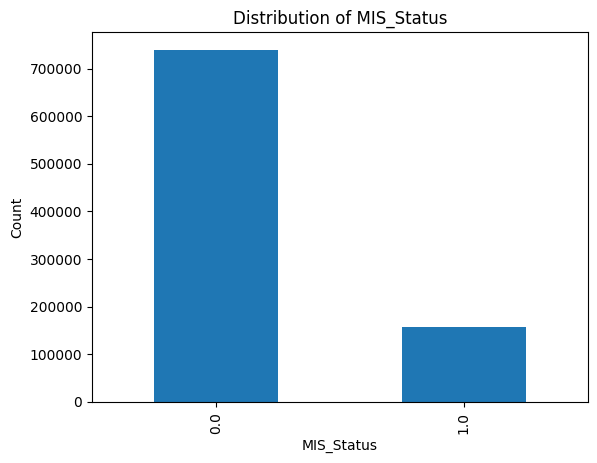

In [22]:
import matplotlib.pyplot as plt

# Plot the distribution of MIS_Status
df2['MIS_Status'].value_counts().plot(kind='bar')
plt.xlabel('MIS_Status')
plt.ylabel('Count')
plt.title('Distribution of MIS_Status')
plt.show()


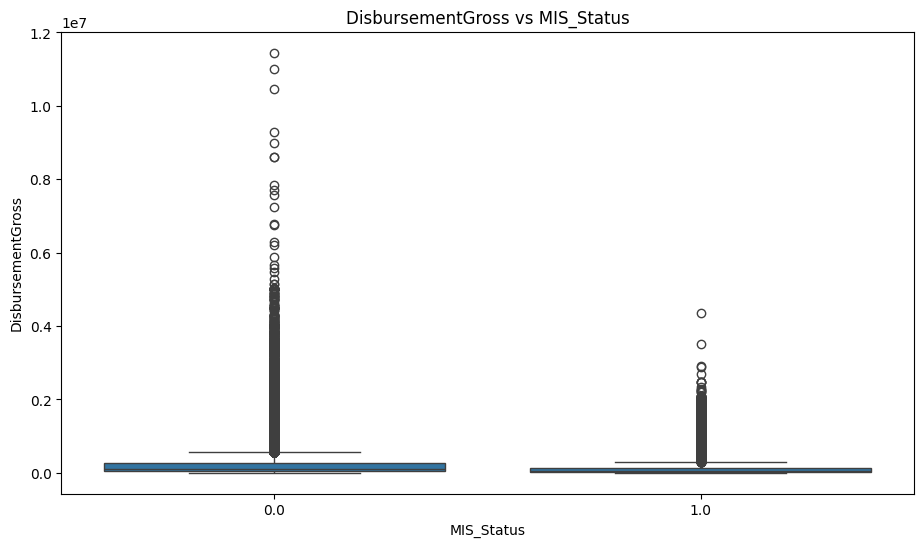

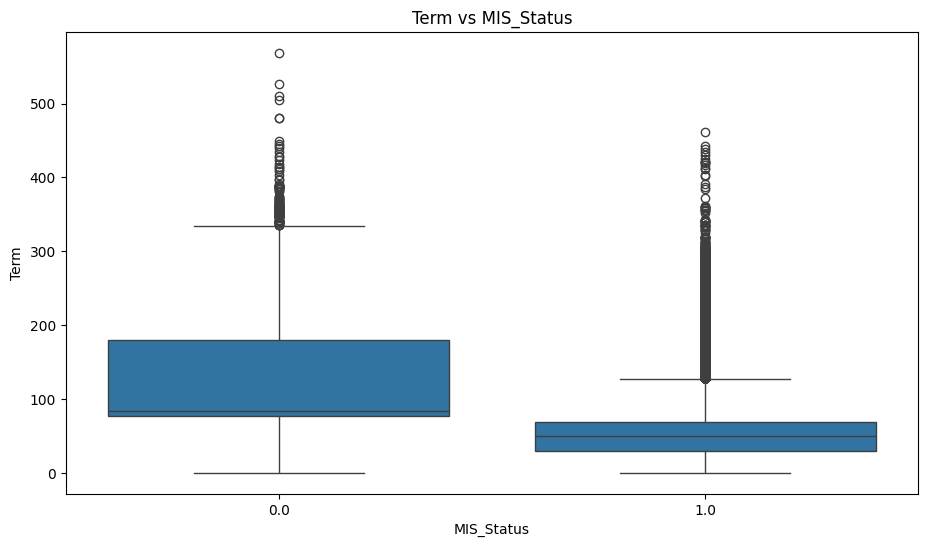

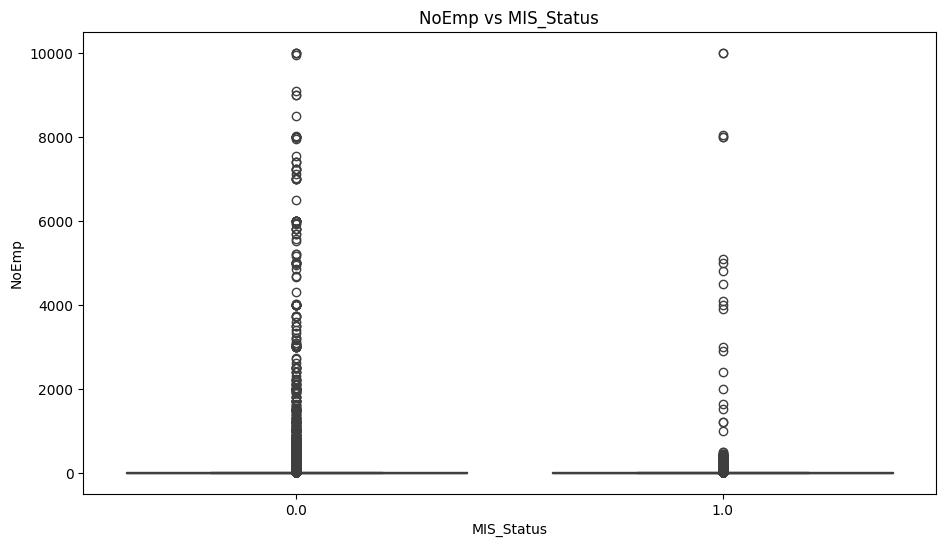

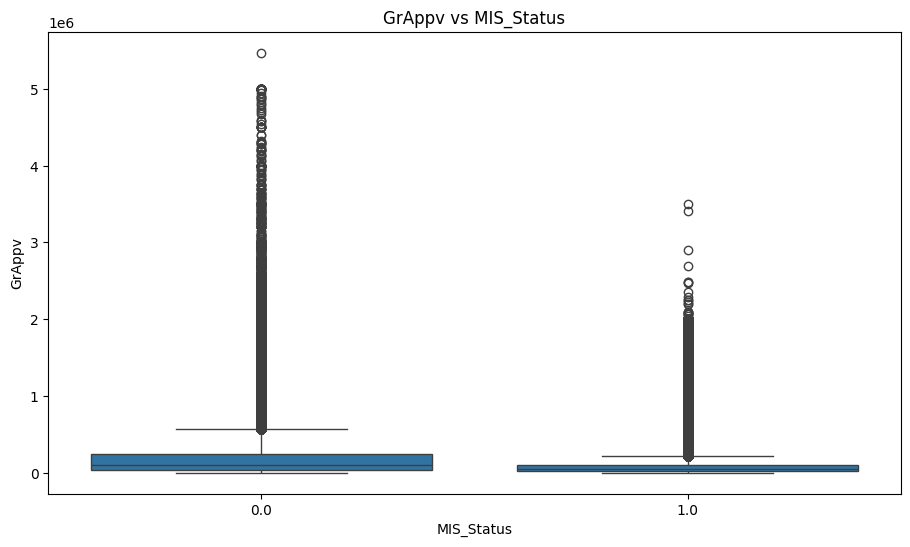

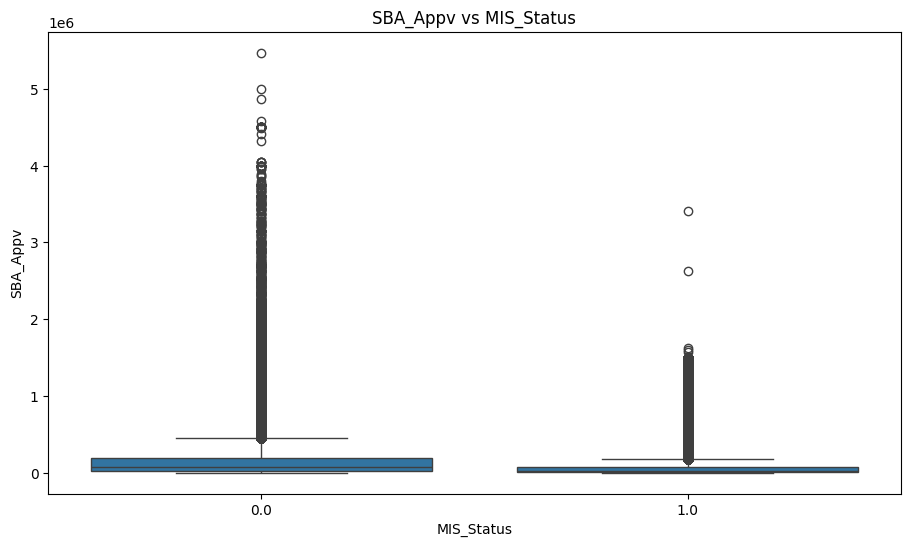

In [25]:
import seaborn as sns

numerical_features = ['DisbursementGross', 'Term', 'NoEmp', 'GrAppv', 'SBA_Appv']

for feature in numerical_features:
    plt.figure(figsize=(11, 6))
    sns.boxplot(x='MIS_Status', y=feature, data=df2)
    plt.title(f'{feature} vs MIS_Status')
    plt.show()


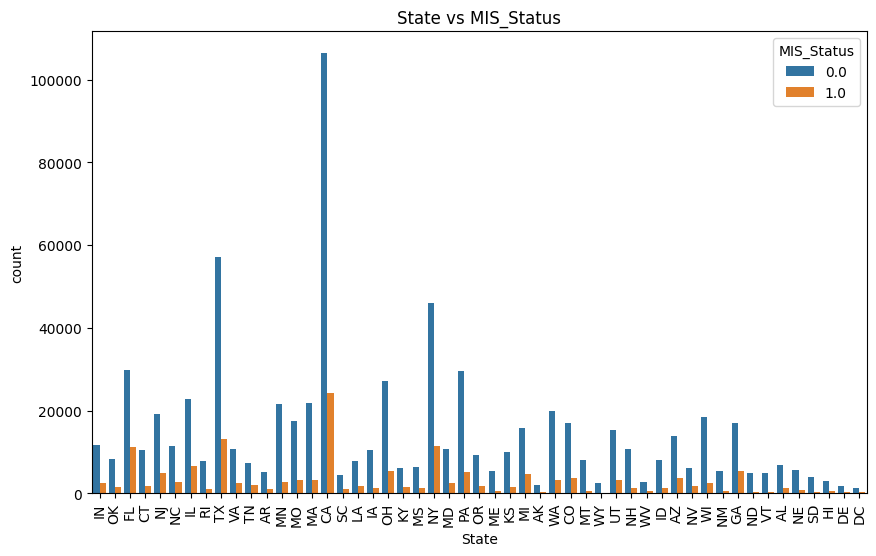

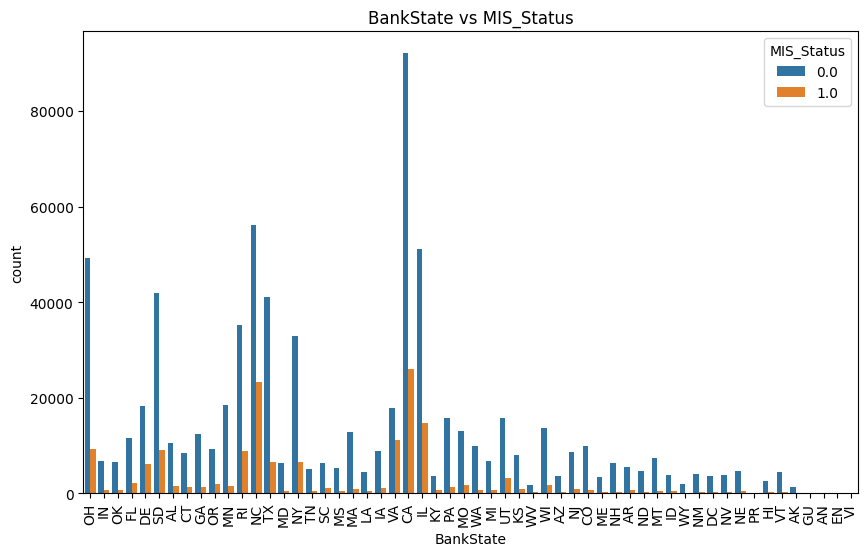

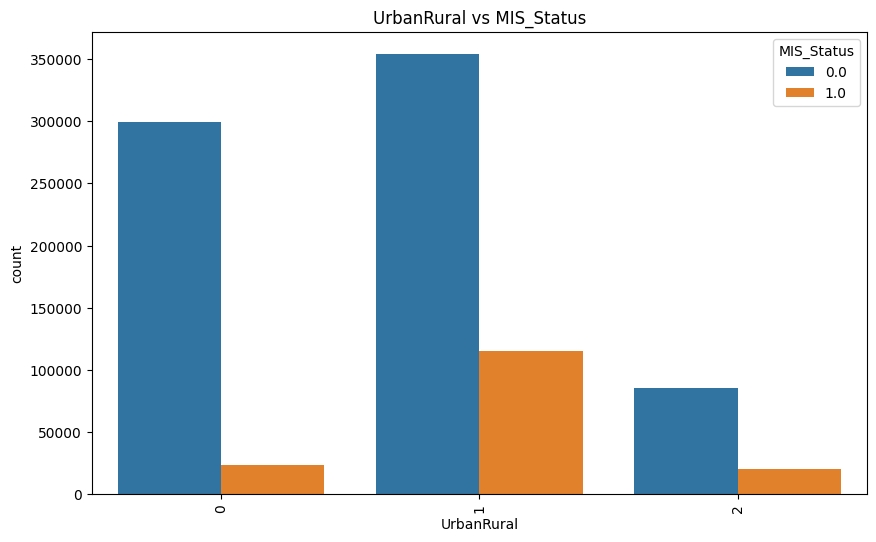

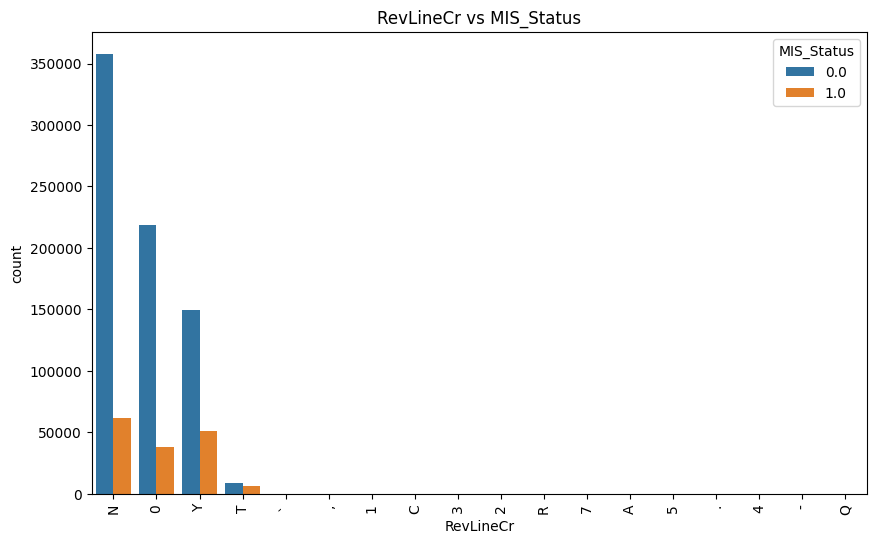

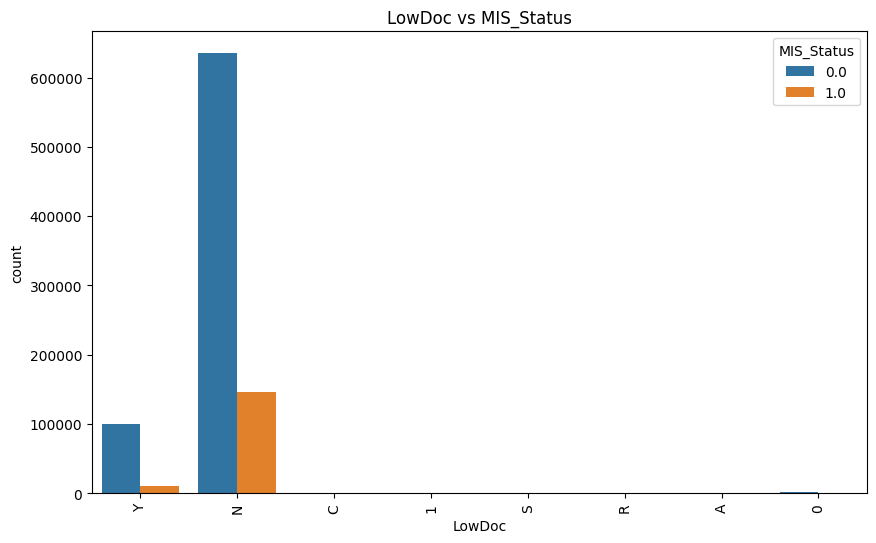

In [24]:
categorical_features = ['State', 'BankState', 'UrbanRural', 'RevLineCr', 'LowDoc']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='MIS_Status', data=df2)
    plt.title(f'{feature} vs MIS_Status')
    plt.xticks(rotation=90)
    plt.show()


In [27]:
df2["NAICS"]

0         451120
1         722410
2         621210
3              0
4              0
           ...  
899159    451120
899160    451130
899161    332321
899162         0
899163         0
Name: NAICS, Length: 899164, dtype: int64

In [ ]:
def naics_to_anzsic(naics):

    mapper = {
        "21": "B",

    }

    anzsic = mapper[str(naics)[:2]]
    return anzsic